In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

fun theme


In [3]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
sns.set_style('darkgrid')
plt.xkcd()

dataset: [link to kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

In [4]:
data = pd.read_csv('insurance.csv')

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data = pd.get_dummies(data, drop_first=True)
data.head()
#convert category to numeric

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


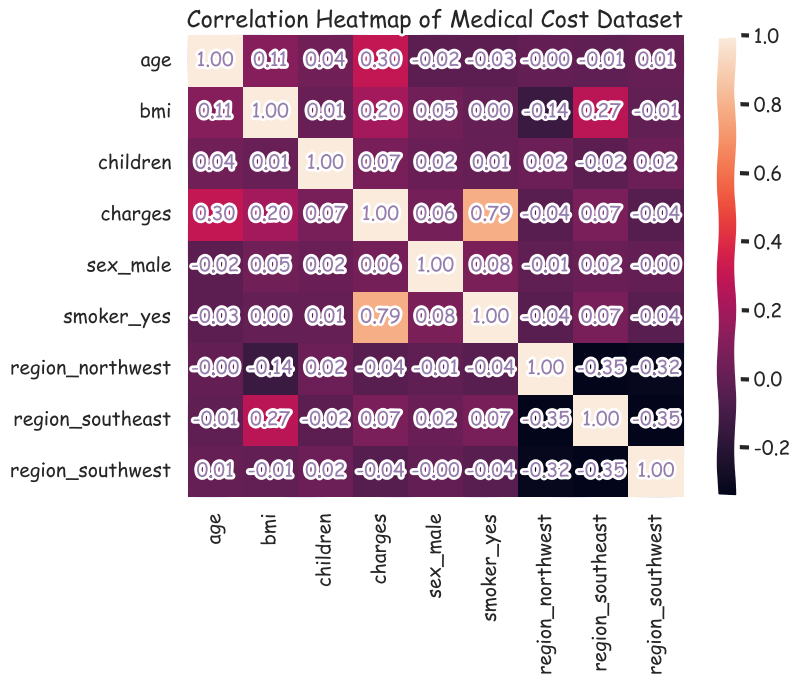

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True,annot_kws={"color": "#957DAD"},fmt=".2f")
plt.title("Correlation Heatmap of Medical Cost Dataset")
plt.show()


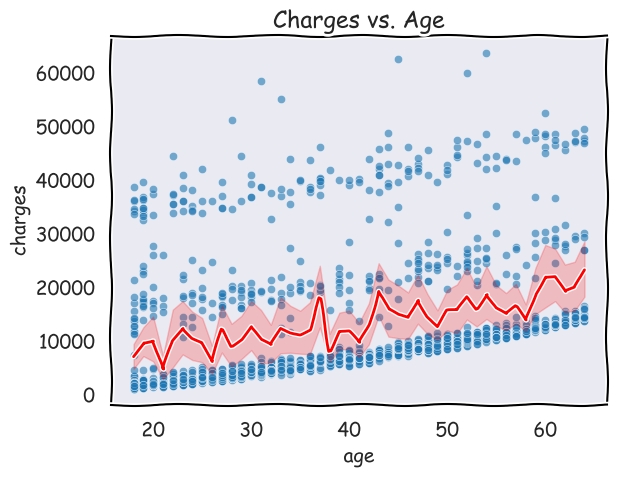

In [11]:
sns.scatterplot(x="age", y="charges", data=data, alpha=0.6)
sns.lineplot(x="age", y="charges", data=data.sort_values("age"), color="red")
plt.title("Charges vs. Age")
plt.show()


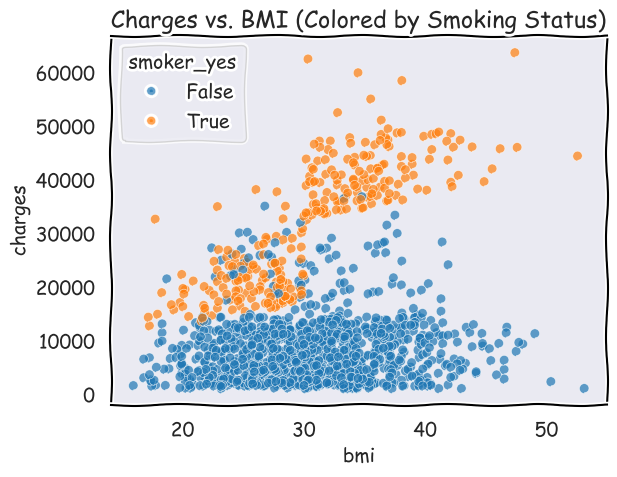

In [12]:
sns.scatterplot(x="bmi", y="charges", hue="smoker_yes", data=data, alpha=0.7)
plt.title("Charges vs. BMI (Colored by Smoking Status)")
plt.show()


smoker status

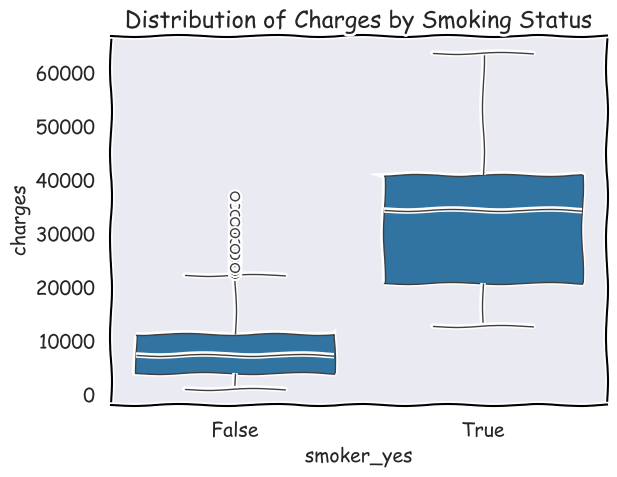

In [13]:
sns.boxplot(x="smoker_yes", y="charges", data=data)
plt.title("Distribution of Charges by Smoking Status")
plt.show()


In [14]:
model = LinearRegression()

In [15]:
X = data.drop("charges", axis=1)
y = data["charges"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#scale for better performance
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)



In [17]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)


In [ ]:
x2_poly = sm.add_constant(X_train_poly)

#fit linear regression model
model_poly = sm.OLS(y_train, x2_poly).fit()

#view model summary
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     152.7
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:24:12   Log-Likelihood:                -10583.
No. Observations:                1070   AIC:                         2.124e+04
Df Residuals:                    1033   BIC:                         2.142e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    148.666     89.772      0.0

adj R^2 = 0.836

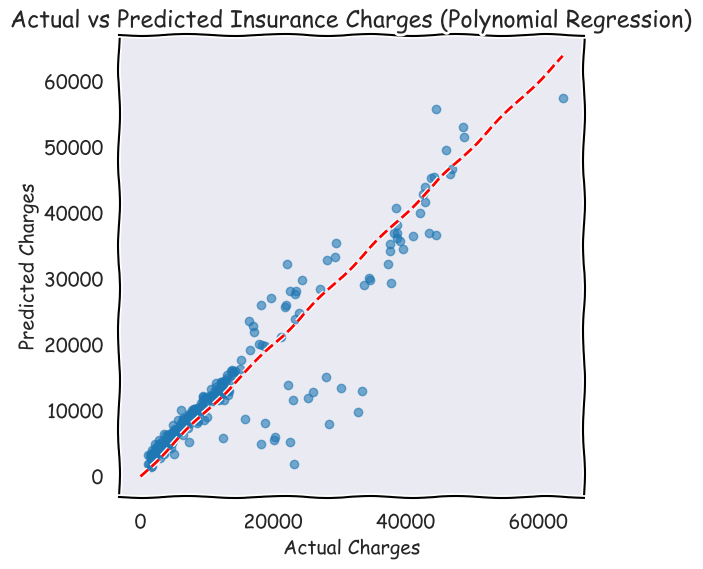

In [19]:


# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges (Polynomial Regression)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()


In [20]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_lin = model_linear.predict(X_test)


In [21]:
print(X_train.dtypes)

age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [22]:
X_train_numeric = X_train.astype(float)
x2_linear = sm.add_constant(X_train_numeric)

model_linear2 = sm.OLS(y_train, x2_linear).fit()

print(model_linear2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          1.32e-305
Time:                        14:24:12   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.193e+04   1114.505  

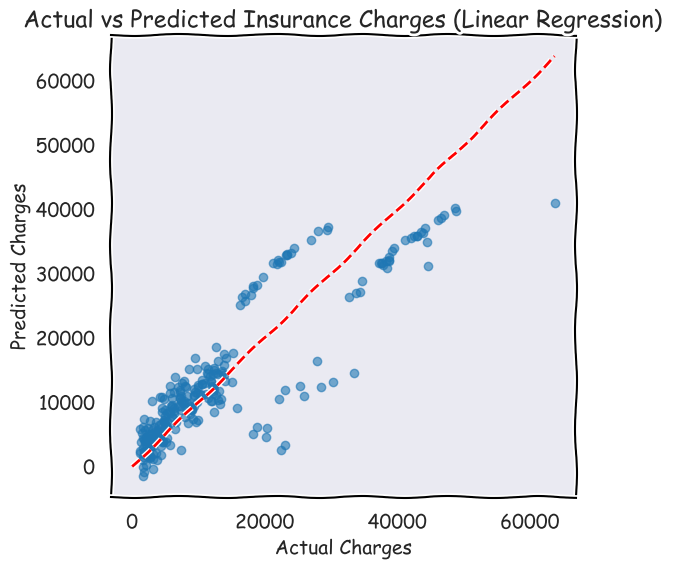

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges (Linear Regression)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()

In [24]:
print("Linear R²:", r2_score(y_test, y_pred_lin))
print('Poly R^2:', r2_score(y_test, y_pred_poly)) 

Linear R²: 0.7835929767120723
Poly R^2: 0.866583090316484
